In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.2MB/s 
     |████████████████████████████████| 1.2MB 13.3MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 194kB 15.7MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [4]:
# Train a segmentation model with fastai using CAMVID dataset
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"),
    label_func= lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes= np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time
0,2.706306,2.438374,00:01


epoch,train_loss,valid_loss,time
0,1.839236,1.495564,00:01
1,1.627073,1.404573,00:01
2,1.478029,1.172711,00:01
3,1.339623,0.978962,00:01
4,1.192593,0.926183,00:01
5,1.071151,0.844452,00:01
6,0.974448,0.804535,00:01
7,0.899372,0.805515,00:01


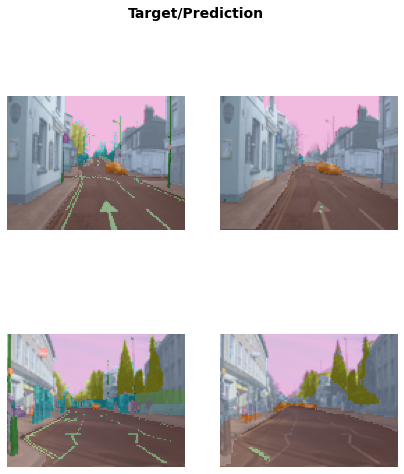

In [9]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
# We can visualize how well it color code each pixel of an image. It nearly perfectly classifies every pixel in every object.